In [ ]:
# Importing Pandas Module
import pandas as pd

In [ ]:
# Reading CSV file as data
data=pd.read_csv("test.csv")

In [ ]:
# Checking for null values in the dataset
data.isnull().any()

Subject    False
body       False
date       False
from       False
dtype: bool

In [ ]:
# Task 1: Sentiment Labeling
# Importing NLTK and VADER for Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Downloading the VADER lexicon
nltk.download("vader_lexicon")

# Initializing VADER
sia = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment(text):
    if not isinstance(text, str):  # handling NaN
        return "Neutral"
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Applying on the 'body' column
data["Sentiment"] = data["body"].apply(get_sentiment)

# Previewing results
print(data[["Subject", "body", "Sentiment"]].head())

# Creating a new dataframe with Employee and Sentiment Score
data.to_csv("test_with_sentiment.csv", index=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sgred\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body Sentiment  
0  EnronOptions Announcement\n\n\nWe have updated...  Positive  
1  Marc,\n\nUnfortunately, today is not going to ...  Positive  
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   Neutral  
3  we were thinking papasitos (we can meet somewh...   Neutral  
4  Since you never gave me the $20 for the last t...  Positive  


In [ ]:
# Counting how many Positive, Negative, Neutral exists
sentiment_counts = data["Sentiment"].value_counts()

print(sentiment_counts)



Sentiment
Positive    1528
Neutral      511
Negative     152
Name: count, dtype: int64
{'Positive': 1528, 'Neutral': 511, 'Negative': 152}


Dataset Shape: (2191, 5)

Data Types:
 Subject              object
body                 object
date         datetime64[ns]
from                 object
Sentiment            object
dtype: object

Missing Values:
 Subject      0
body         0
date         0
from         0
Sentiment    0
dtype: int64

Sentiment Distribution:
 Sentiment
Positive    1528
Neutral      511
Negative     152
Name: count, dtype: int64


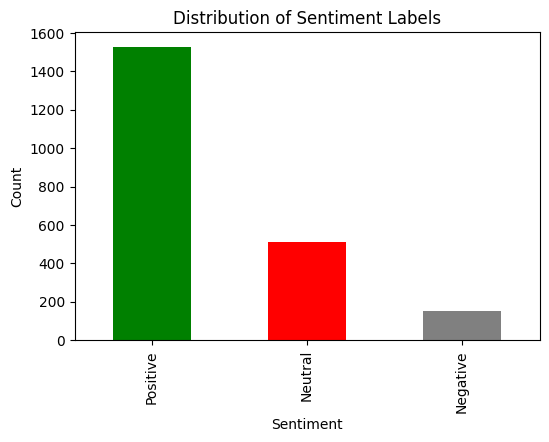

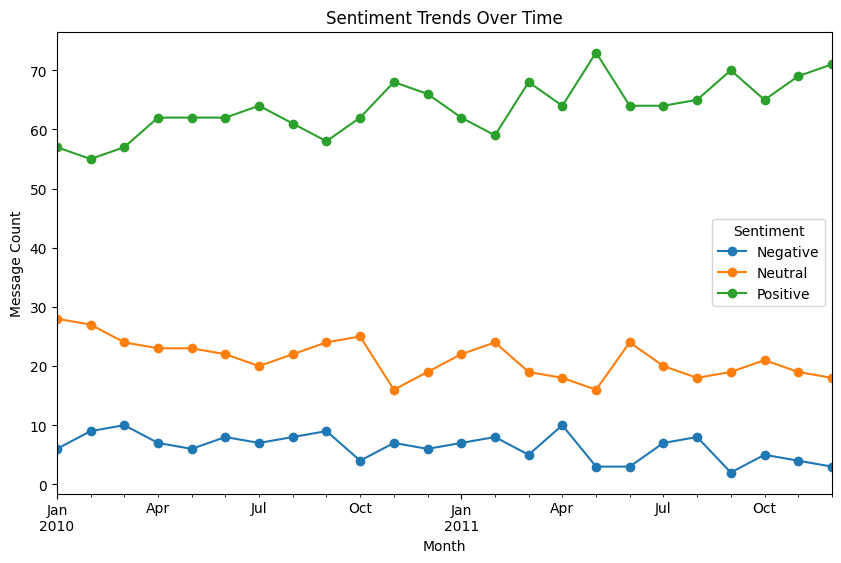


Top 10 Senders:
 from
lydia.delgado@enron.com        284
john.arnold@enron.com          256
sally.beck@enron.com           227
patti.thompson@enron.com       225
bobette.riner@ipgdirect.com    217
johnny.palmer@enron.com        213
don.baughman@enron.com         213
eric.bass@enron.com            210
kayne.coulter@enron.com        174
rhonda.denton@enron.com        172
Name: count, dtype: int64


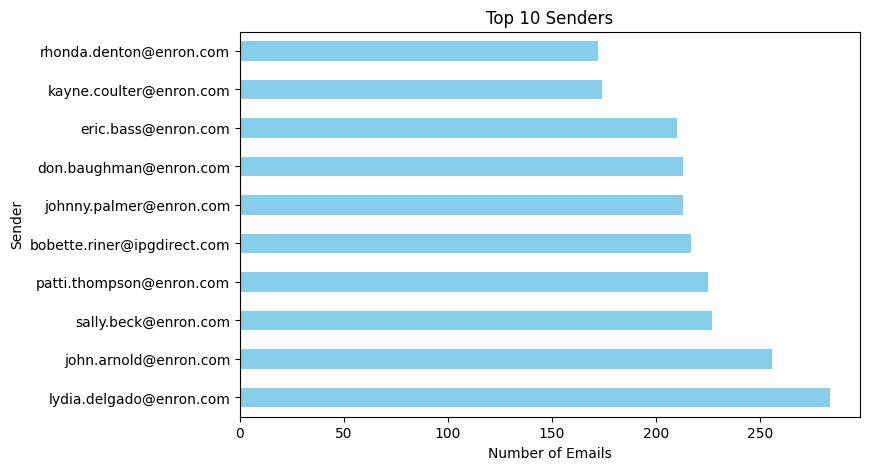


Sample Sentiment Ratios by Sender:
 Sentiment                    Negative   Neutral  Positive
from                                                     
bobette.riner@ipgdirect.com  0.096774  0.244240  0.658986
don.baughman@enron.com       0.075117  0.276995  0.647887
eric.bass@enron.com          0.047619  0.209524  0.742857
john.arnold@enron.com        0.042969  0.210938  0.746094
johnny.palmer@enron.com      0.079812  0.239437  0.680751


In [ ]:
# Task 2: Exploratory Data Analysis (EDA)
# Importing Matplotlib for Visualization
import matplotlib.pyplot as plt

# Ensure date is datetime
data["date"] = pd.to_datetime(data["date"], errors="coerce")

# 1. Data Structure
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

# 2. Sentiment Distribution
sentiment_counts = data["Sentiment"].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green","red","gray"])
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 3. Trends Over Time
monthly_trends = data.groupby([data["date"].dt.to_period("M"), "Sentiment"]).size().unstack().fillna(0)

monthly_trends.plot(kind="line", figsize=(10,6), marker="o")
plt.title("Sentiment Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.show()

# 4a. Top Senders
top_senders = data["from"].value_counts().head(10)
print("\nTop 10 Senders:\n", top_senders)

plt.figure(figsize=(8,5))
top_senders.plot(kind="barh", color="skyblue")
plt.title("Top 10 Senders")
plt.xlabel("Number of Emails")
plt.ylabel("Sender")
plt.show()

# 4b. Sentiment by Sender
sender_sentiment = data.groupby("from")["Sentiment"].value_counts(normalize=True).unstack().fillna(0)
print("\nSample Sentiment Ratios by Sender:\n", sender_sentiment.head())


In [ ]:
# Task 3: Employee Score Calculation
# Step 1: Assigning sentiment scores
score_map = {"Positive": 1, "Negative": -1, "Neutral": 0}
data["Score"] = data["Sentiment"].map(score_map)

# Step 2: Checking date is datetime and extract month
data["date"] = pd.to_datetime(data["date"], errors="coerce")
data["Month"] = data["date"].dt.to_period("M")

# Step 3: Grouping by employee and month, then sum scores
employee_monthly_scores = (
    data.groupby(["from", "Month"])["Score"]
    .sum()
    .reset_index()
    .rename(columns={"from": "Employee", "Score": "Sentiment_Score"})
)

print(employee_monthly_scores)


                        Employee    Month  Sentiment_Score
0    bobette.riner@ipgdirect.com  2010-01                1
1    bobette.riner@ipgdirect.com  2010-02                7
2    bobette.riner@ipgdirect.com  2010-03                6
3    bobette.riner@ipgdirect.com  2010-04                3
4    bobette.riner@ipgdirect.com  2010-05                2
..                           ...      ...              ...
235         sally.beck@enron.com  2011-08                3
236         sally.beck@enron.com  2011-09                0
237         sally.beck@enron.com  2011-10                6
238         sally.beck@enron.com  2011-11                5
239         sally.beck@enron.com  2011-12                6

[240 rows x 3 columns]


In [ ]:
# Task 4: Employee Ranking
# Top 3 Positive Employees per month
top_positive = (
   employee_monthly_scores
    .sort_values(["Month", "Sentiment_Score", "Employee"], ascending=[True, False, True])
    .groupby("Month")
    
)
print("Top 3 Positive Employees per Month:")
print(top_positive.head(3))

# Top 3 Negative Employees per month
top_negative = (
    employee_monthly_scores
    .sort_values(["Month", "Sentiment_Score", "Employee"], ascending=[True, True, True])
    .groupby("Month")
    
)
print("\nTop 3 Negative Employees per Month:")
print(top_negative.head(3))


Top 3 Positive Employees per Month:
                        Employee    Month  Sentiment_Score
120      kayne.coulter@enron.com  2010-01               13
48           eric.bass@enron.com  2010-01                9
144      lydia.delgado@enron.com  2010-01                9
73         john.arnold@enron.com  2010-02               11
97       johnny.palmer@enron.com  2010-02               10
..                           ...      ...              ...
94         john.arnold@enron.com  2011-11               10
22   bobette.riner@ipgdirect.com  2011-11                9
71           eric.bass@enron.com  2011-12               12
191     patti.thompson@enron.com  2011-12               12
167      lydia.delgado@enron.com  2011-12               10

[72 rows x 3 columns]

Top 3 Negative Employees per Month:
                        Employee    Month  Sentiment_Score
0    bobette.riner@ipgdirect.com  2010-01                1
96       johnny.palmer@enron.com  2010-01                1
192      rhonda.den

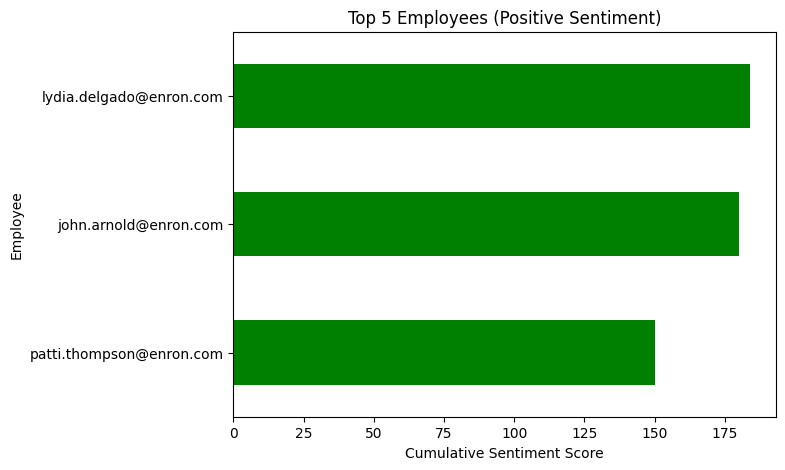

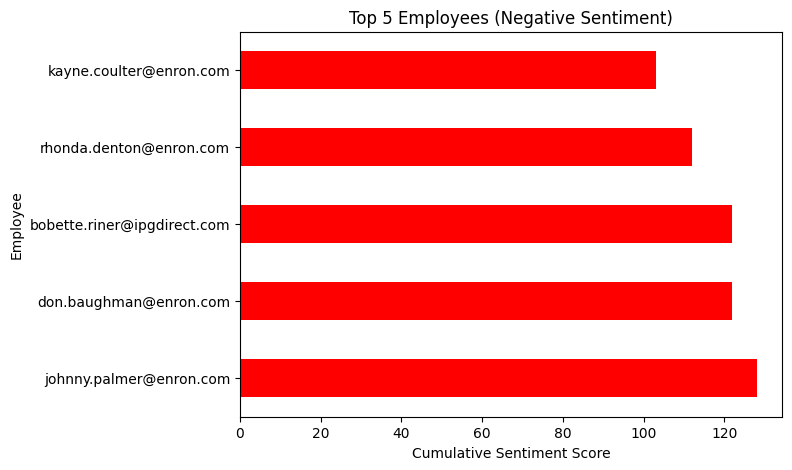

In [ ]:
# Visualizations for Top Employees
import matplotlib.pyplot as plt

# Top 5 Positive employees overall
top_pos_overall = (
    employee_monthly_scores.groupby("Employee")["Sentiment_Score"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

plt.figure(figsize=(7,5))
top_pos_overall.plot(kind="barh", color="green")
plt.title("Top 5 Employees (Positive Sentiment)")
plt.xlabel("Cumulative Sentiment Score")
plt.gca().invert_yaxis()
plt.show()

# Top 5 Negative employees overall
top_neg_overall = (
    employee_monthly_scores.groupby("Employee")["Sentiment_Score"]
    .sum()
    .sort_values()
    .head(5)
)

plt.figure(figsize=(7,5))
top_neg_overall.plot(kind="barh", color="red")
plt.title("Top 5 Employees (Negative Sentiment)")
plt.xlabel("Cumulative Sentiment Score")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Task 5: Flight Risk Identification
# Identifying employees with 4 or more negative emails in any rolling 30-day window
import numpy as np

# 1. Filtering negative emails
negatives = data[data["Sentiment"] == "Negative"].copy()
negatives["date"] = pd.to_datetime(negatives["date"], errors="coerce")

# 2. Sort by employee and date
negatives = negatives.sort_values(["from", "date"])

# 3. Rolling 30-day window count
flight_risk_employees = set()

for emp, group in negatives.groupby("from"):
    dates = group["date"].dropna().sort_values().to_list()
    n = len(dates)
    for i in range(n):
        # Count how many dates fall within 30 days from dates[i]
        count = 1
        for j in range(i+1, n):
            if (dates[j] - dates[i]).days <= 30:
                count += 1
            else:
                break
        if count >= 4:
            flight_risk_employees.add(emp)
            break  # No need to check further for this employee

# 4. Output the list
print("Flight Risk Employees (>=4 negative mails in any 30-day window):")
print(list(flight_risk_employees))

Flight Risk Employees (>=4 negative mails in any 30-day window):
['johnny.palmer@enron.com', 'don.baughman@enron.com', 'bobette.riner@ipgdirect.com', 'sally.beck@enron.com']


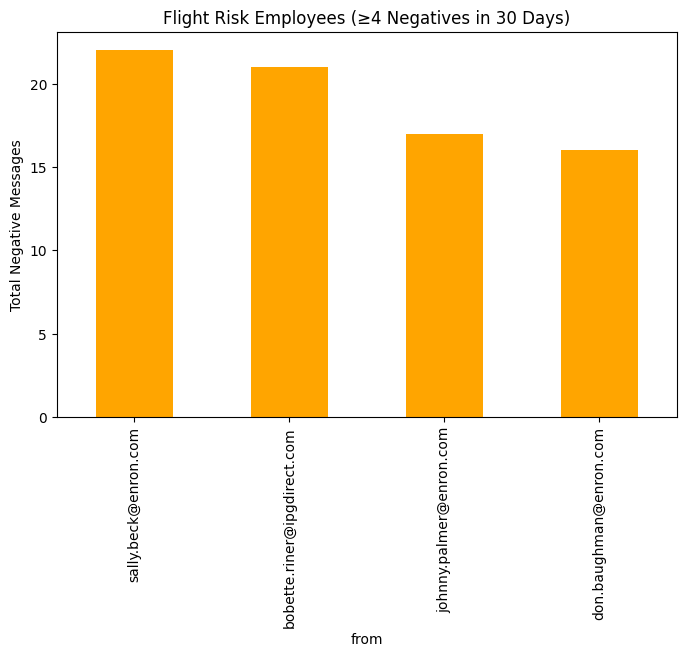

In [13]:
# Bar chart showing count of negative mails per flagged employee
neg_counts = (
    data[data["Sentiment"]=="Negative"]
    .groupby("from")
    .size()
    .loc[list(flight_risk_employees)]
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
neg_counts.plot(kind="bar", color="orange")
plt.title("Flight Risk Employees (≥4 Negatives in 30 Days)")
plt.ylabel("Total Negative Messages")
plt.show()


In [ ]:
# Task 6: Predictive Modeling
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- Feature Engineering ---

# Message length (characters)
data["msg_length"] = data["body"].astype(str).apply(len)
# Word count
data["word_count"] = data["body"].astype(str).apply(lambda x: len(x.split()))
# Message frequency per employee per month
data["Month"] = pd.to_datetime(data["date"], errors="coerce").dt.to_period("M")
monthly_counts = data.groupby(["from", "Month"]).size().reset_index(name="msg_count")
data = pd.merge(data, monthly_counts, on=["from", "Month"], how="left")

# --- Prepare Modeling Data ---

# We'll predict Sentiment_Score at the employee-month level
score_map = {"Positive": 1, "Negative": -1, "Neutral": 0}
data["Score"] = data["Sentiment"].map(score_map)
agg = data.groupby(["from", "Month"]).agg({
    "Score": "sum",
    "msg_count": "first",
    "msg_length": "mean",
    "word_count": "mean"
}).reset_index().rename(columns={"Score": "Sentiment_Score"})

# --- Modeling ---

# Features and target
X = agg[["msg_count", "msg_length", "word_count"]]
y = agg["Sentiment_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# --- Evaluation ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print("Coefficients:", dict(zip(X.columns, lr.coef_)))
print("Intercept:", lr.intercept_)

# --- Interpretation ---
print("\nInterpretation:")
print("Higher message frequency or longer messages may be associated with higher or lower sentiment scores depending on the sign of the coefficients above.")
print("Check which features have the strongest influence by looking at the magnitude of the coefficients.")

Linear Regression Results:
Mean Squared Error: 3.33
R^2 Score: 0.72
Coefficients: {'msg_count': 0.6281830515377534, 'msg_length': -0.0026835819209529437, 'word_count': 0.03032873583939858}
Intercept: -0.5130125214601415

Interpretation:
Higher message frequency or longer messages may be associated with higher or lower sentiment scores depending on the sign of the coefficients above.
Check which features have the strongest influence by looking at the magnitude of the coefficients.


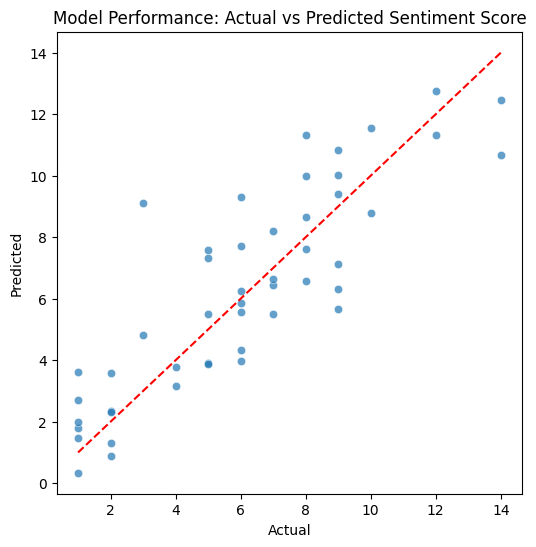

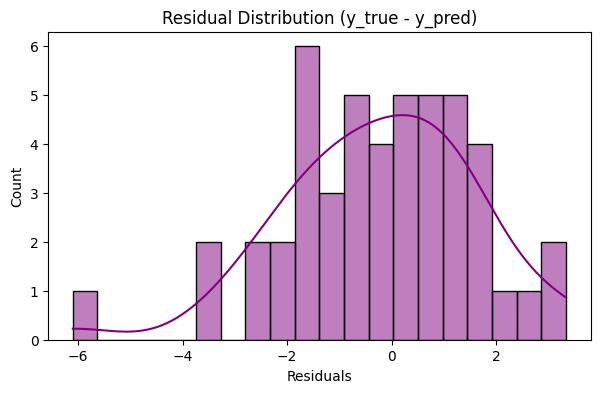

In [ ]:
# --- Visualizations ---
import seaborn as sns

# Scatter: Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Model Performance: Actual vs Predicted Sentiment Score")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True, bins=20, color="purple")
plt.title("Residual Distribution (y_true - y_pred)")
plt.xlabel("Residuals")
plt.show()
